<a href="https://colab.research.google.com/github/Shevadesuyash/Cricket-Player-Performance-Analysis/blob/main/Cricket_Player_Performance_Analysis_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **downlode the data**

In [1]:
import os
import kagglehub
import shutil
import pandas as pd


# Download the dataset https://www.kaggle.com/datasets/akarshsinghh/cricket-player-performance-prediction
source_dir = kagglehub.dataset_download("akarshsinghh/cricket-player-performance-prediction")
print("Path to dataset files:", source_dir)


# Step 1: Define the source and destination paths
destination_dir = "/content/cricket_dataset"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Step 2: Move the files to /content/cricket_dataset
files_to_move = ["match.csv", "bat.csv", "ball.csv"]

for file in files_to_move:
    source_path = os.path.join(source_dir, file)
    destination_path = os.path.join(destination_dir, file)
    shutil.move(source_path, destination_path)
    print(f"Moved {file} to {destination_path}")

# Step 3: Load the datasets
match_df = pd.read_csv(os.path.join(destination_dir, "match.csv"))
bat_df = pd.read_csv(os.path.join(destination_dir, "bat.csv"))
ball_df = pd.read_csv(os.path.join(destination_dir, "ball.csv"))

# Step 4: Verify the datasets
print("Match Data:")
print(match_df.head())
print("\nBatting Data:")
print(bat_df.head())
print("\nBowling Data:")
print(ball_df.head())

# Step 5: Save the datasets for easy access (optional)
match_df.to_csv("/content/match.csv", index=False)
bat_df.to_csv("/content/bat.csv", index=False)
ball_df.to_csv("/content/ball.csv", index=False)
print("Datasets saved to /content/")

100%|██████████| 2.42M/2.42M [00:00<00:00, 60.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/akarshsinghh/cricket-player-performance-prediction/versions/2
Moved match.csv to /content/cricket_dataset/match.csv
Moved bat.csv to /content/cricket_dataset/bat.csv
Moved ball.csv to /content/cricket_dataset/ball.csv
Match Data:
   Unnamed: 0  match_number                name                 start_date  \
0        1417           1.0  Bangladesh v India  2004-12-22 18:30:00+00:00   
1        1418           1.0  Bangladesh v India  2004-12-22 18:30:00+00:00   
2        1419           2.0  Bangladesh v India  2004-12-25 18:30:00+00:00   
3        1420           2.0  Bangladesh v India  2004-12-25 18:30:00+00:00   
4        1421           3.0  Bangladesh v India  2004-12-26 18:30:00+00:00   

  matchtype  series_id  match_detail_id  scorecard_id               title  \
0       odi        182              773          1495       India Innings   
1       odi        182              773          1496  Bangladesh Innings   
2       odi    

# **Step 1: Understand the Datasets**
1.1 Load the Datasets

In [2]:
import pandas as pd

# Load the datasets
match_df = pd.read_csv("/content/match.csv")
bat_df = pd.read_csv("/content/bat.csv")
ball_df = pd.read_csv("/content/ball.csv")

# Display the first few rows of each dataset
print("Match Data:")
print(match_df.head())

print("\nBatting Data:")
print(bat_df.head())

print("\nBowling Data:")
print(ball_df.head())

Match Data:
   Unnamed: 0  match_number                name                 start_date  \
0        1417           1.0  Bangladesh v India  2004-12-22 18:30:00+00:00   
1        1418           1.0  Bangladesh v India  2004-12-22 18:30:00+00:00   
2        1419           2.0  Bangladesh v India  2004-12-25 18:30:00+00:00   
3        1420           2.0  Bangladesh v India  2004-12-25 18:30:00+00:00   
4        1421           3.0  Bangladesh v India  2004-12-26 18:30:00+00:00   

  matchtype  series_id  match_detail_id  scorecard_id               title  \
0       odi        182              773          1495       India Innings   
1       odi        182              773          1496  Bangladesh Innings   
2       odi        182              774          1497  Bangladesh Innings   
3       odi        182              774          1498       India Innings   
4       odi        182              775          1499       India Innings   

   runs  over  run_rate  match_id  opp_team_id  team_id 

1.2 Check Dataset Information

In [3]:
# Check column names and data types
print("Match Data Info:")
print(match_df.info())

print("\nBatting Data Info:")
print(bat_df.info())

print("\nBowling Data Info:")
print(ball_df.info())

Match Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6199 non-null   int64  
 1   match_number     6124 non-null   float64
 2   name             6197 non-null   object 
 3   start_date       6199 non-null   object 
 4   matchtype        6195 non-null   object 
 5   series_id        6199 non-null   int64  
 6   match_detail_id  6199 non-null   int64  
 7   scorecard_id     6199 non-null   int64  
 8   title            6199 non-null   object 
 9   runs             6199 non-null   int64  
 10  over             6199 non-null   float64
 11  run_rate         6199 non-null   float64
 12  match_id         6199 non-null   int64  
 13  opp_team_id      6199 non-null   int64  
 14  team_id          6199 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 726.6+ KB
None

Batting Data Info:
<clas

# **Step 2: Data Preprocessing**


2.1 Merge Datasets

In [6]:
# Merge batting data with match data
bat_match_df = pd.merge(bat_df, match_df, on="match_id", how="left")

# Merge bowling data with match data
ball_match_df = pd.merge(ball_df, match_df, on="match_id", how="left")

# Display the merged datasets
print("Batting + Match Data:")
print(bat_match_df.head())

print("\nBowling + Match Data:")
print(ball_match_df.head())

Batting + Match Data:
   Unnamed: 0_x         name_x playing_role     id  order  runs_x  balls  \
0         13463  Tapash Baisya          NaN  13464      9       7      5   
1         13463  Tapash Baisya          NaN  13464      9       7      5   
2         13462  Khaled Mahmud          NaN  13463      8      21     17   
3         13462  Khaled Mahmud          NaN  13463      8      21     17   
4         13459    Rajin Saleh          NaN  13460      5      14     28   

   strike_rate  fours  sixes  ... matchtype_y  series_id_y  match_detail_id_y  \
0       140.00      1      0  ...         odi          182                773   
1       140.00      1      0  ...         odi          182                773   
2       123.52      3      0  ...         odi          182                773   
3       123.52      3      0  ...         odi          182                773   
4        50.00      1      0  ...         odi          182                773   

   scorecard_id_y             titl

# **Step 3: Exploratory Data Analysis (EDA)**
3.1 Distribution of Runs Scored

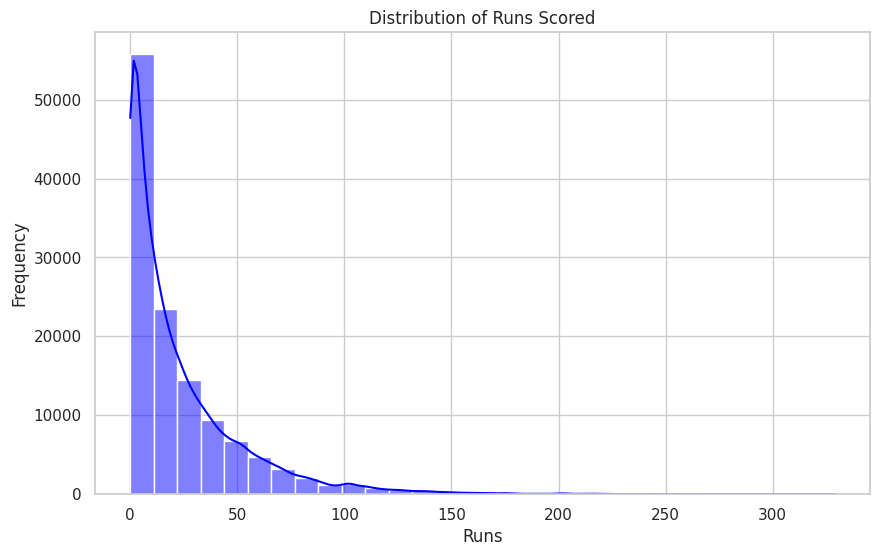

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Plot the distribution of runs scored
plt.figure(figsize=(10, 6))
sns.histplot(bat_match_df['runs_x'], bins=30, kde=True, color='blue')
plt.title("Distribution of Runs Scored")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

3.2 Top 10 Batsmen by Runs

<ipython-input-8-8a9a668bbbd0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs_x', y='name_x', data=top_batsmen, palette='viridis')


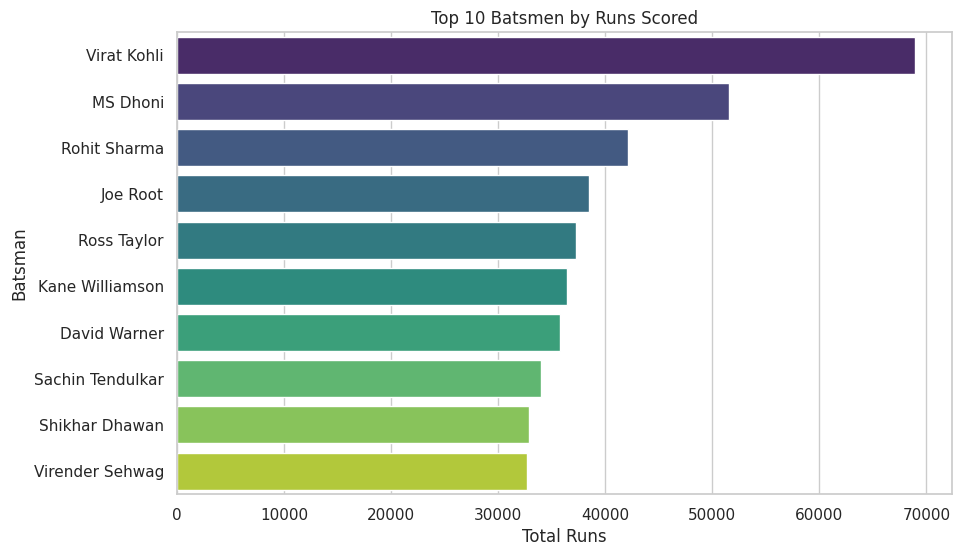

In [8]:
# Top 10 batsmen by runs scored
top_batsmen = bat_match_df.groupby('name_x')['runs_x'].sum().nlargest(10).reset_index()

# Plot the top 10 batsmen
plt.figure(figsize=(10, 6))
sns.barplot(x='runs_x', y='name_x', data=top_batsmen, palette='viridis')
plt.title("Top 10 Batsmen by Runs Scored")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()

3.3 Top 10 Bowlers by Wickets

<ipython-input-9-f6ae2a289bab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='name_x', data=top_bowlers, palette='viridis')


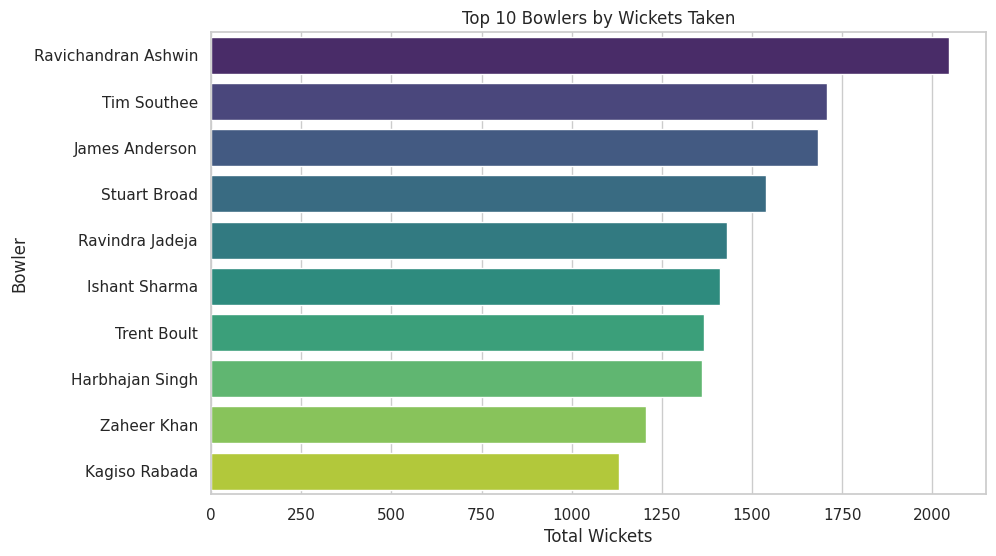

In [9]:
# Top 10 bowlers by wickets taken
top_bowlers = ball_match_df.groupby('name_x')['wickets'].sum().nlargest(10).reset_index()

# Plot the top 10 bowlers
plt.figure(figsize=(10, 6))
sns.barplot(x='wickets', y='name_x', data=top_bowlers, palette='viridis')
plt.title("Top 10 Bowlers by Wickets Taken")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.show()

3.4 Correlation Heatmap

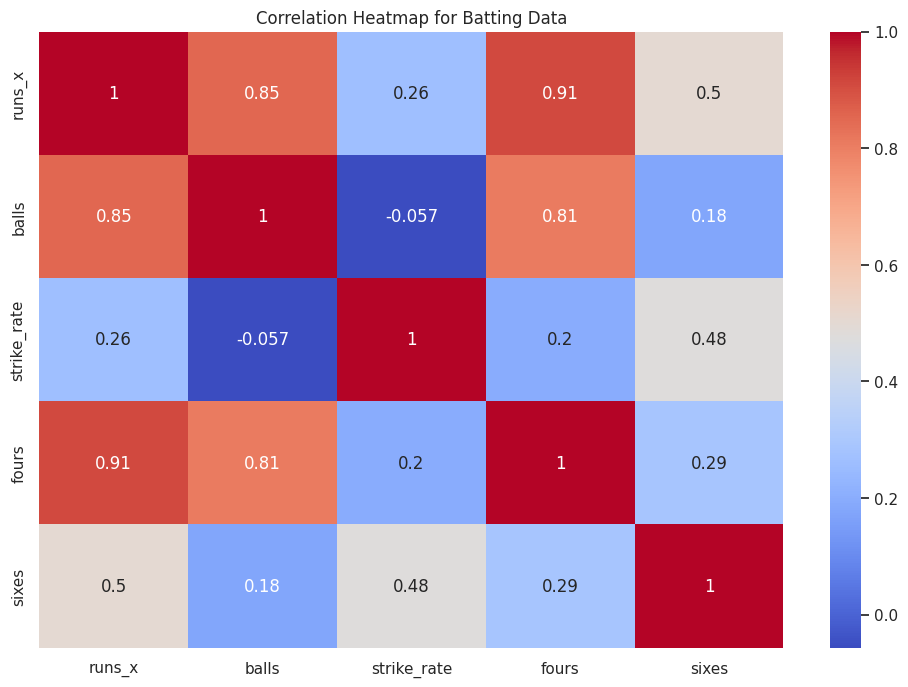

In [10]:
# Correlation matrix for batting data
corr_matrix = bat_match_df[['runs_x', 'balls', 'strike_rate', 'fours', 'sixes']].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Batting Data")
plt.show()

# **Step 4: Model Building**
4.1 Predict Runs Scored
Use a regression model to predict runs scored by a batsman.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = bat_match_df[['balls', 'strike_rate', 'fours', 'sixes']]
y = bat_match_df['runs_x']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 49.55067013081573
R-squared: 0.9443310271814004


# **Step 5: Visualization of Results**
5.1 Actual vs Predicted Runs

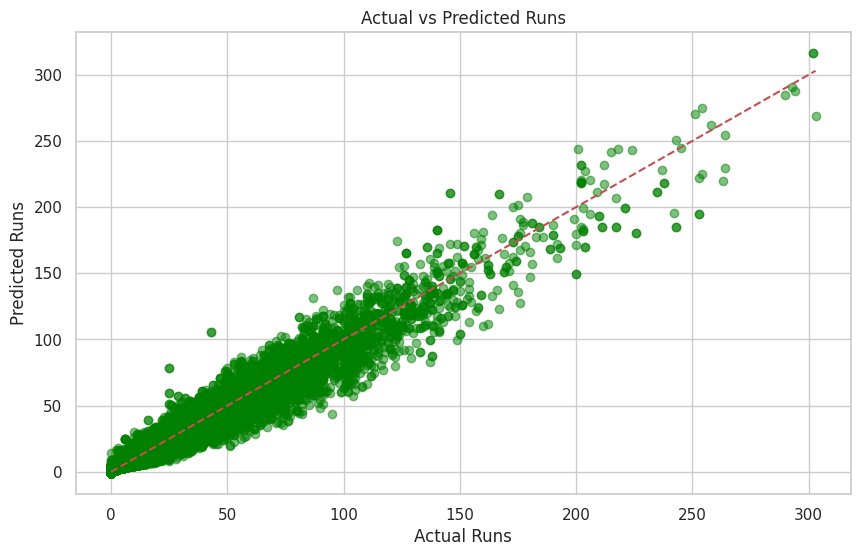

In [12]:
# Scatter plot of actual vs predicted runs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title("Actual vs Predicted Runs")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.show()